# Project: EDA(Exploratory Dat Analysis)
# On Tuberculosis(Pulmonary-TB) Info of Last 2 decades

## Data Source: WHO

* Source: https://www.who.int/tb/country/data/download/en/
* File: https://extranet.who.int/tme/generateCSV.asp?ds=notifications
* Data Dictionary: https://extranet.who.int/tme/generateCSV.asp?ds=dictionary

In [183]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 200)

## For Graphs
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import chart_studio.plotly
from chart_studio.plotly import plot,iplot
import plotly.express as px

## To use iplot with dataframes directly we need cufflinks
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## To make it interactive
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

## Function(s)

In [184]:
def MakeBarChart(a1,b1,title1,x1,y1,data1):
    """
    a1 = x axis value of the figure size
    b1 = y axis value of the figure size
    title1 = title of the figure
    x1 = is the x axis value of the barplot
    y1 = is the y axis value of the barplot
    data1 = is the Dataframe for the barplot
    """
    fig = plt.figure(figsize=(a1,b1))
    plt.title(title1)
    ax = sns.barplot(x=x1,y=y1,data=data1,palette="ch:.25")
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    return ax

In [185]:
MakeBarChart.__doc__

'\n    a1 = x axis value of the figure size\n    b1 = y axis value of the figure size\n    title1 = title of the figure\n    x1 = is the x axis value of the barplot\n    y1 = is the y axis value of the barplot\n    data1 = is the Dataframe for the barplot\n    '

- ```a1``` is the x axis value of the figure size
- ```b1``` is the y axis value of the figure size
- ```title1``` is the title of the figure
- ```x1``` is the x axis value of the barplot
- ```y1``` is the y axis value of the barplot
- ```data1``` is the Dataframe for the barplot

**Note:** Using the above code everytime to create Barplots will save us from writing same code again.

#### Let's Import data dictionary and keep only those dictionaries column which are available in data

In [186]:
data_dict=pd.read_csv("https://extranet.who.int/tme/generateCSV.asp?ds=dictionary")
data_dict.drop(columns=['code_list','dataset'], inplace=True)
data_dict.drop(index=list(range(0,43)), inplace=True)
data_dict.drop(index=list(range(47,247)), inplace=True)
data_dict.drop(index=list(range(407,495)), inplace=True)
print(data_dict.shape)
data_dict

(164, 2)


,variable_name,definition
43,country,Country or territory name
44,iso_numeric,ISO numeric country/territory code
45,iso2,ISO 2-character country/territory code
46,iso3,ISO 3-character country/territory code
247,all_conf_xdr,Number of laboratory-confirmed XDR-TB cases id...
248,c_newinc,Total of new and relapse cases and cases with ...
249,conf_mdr,Number of laboratory-confirmed MDR-TB cases id...
250,conf_mdr_tx,Number of laboratory-confirmed MDR-TB patients...
251,conf_rrmdr,Number of laboratory-confirmed RR-TB or MDR-TB...
252,conf_rrmdr_tx,Number of laboratory-confirmed rifampicin-resi...


## Data Import, size and display

In [187]:
orig=pd.read_csv("https://extranet.who.int/tme/generateCSV.asp?ds=notifications")
print(orig.shape)
orig.head()

(8277, 165)


,country,iso2,iso3,iso_numeric,g_whoregion,year,new_sp,new_sn,new_su,new_ep,new_oth,ret_rel,ret_taf,ret_tad,ret_oth,newret_oth,new_labconf,new_clindx,ret_rel_labconf,ret_rel_clindx,ret_rel_ep,ret_nrel,notif_foreign,c_newinc,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_mu,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu,new_sn_m04,new_sn_m514,new_sn_m014,new_sn_m1524,new_sn_m2534,new_sn_m3544,new_sn_m4554,new_sn_m5564,new_sn_m65,new_sn_m15plus,new_sn_mu,new_sn_f04,new_sn_f514,new_sn_f014,new_sn_f1524,new_sn_f2534,new_sn_f3544,new_sn_f4554,new_sn_f5564,new_sn_f65,new_sn_f15plus,new_sn_fu,new_sn_sexunk04,new_sn_sexunk514,new_sn_sexunk014,new_sn_sexunk15plus,new_ep_m04,new_ep_m514,new_ep_m014,new_ep_m1524,new_ep_m2534,new_ep_m3544,new_ep_m4554,new_ep_m5564,new_ep_m65,new_ep_m15plus,new_ep_mu,new_ep_f04,new_ep_f514,new_ep_f014,new_ep_f1524,new_ep_f2534,new_ep_f3544,new_ep_f4554,new_ep_f5564,new_ep_f65,new_ep_f15plus,new_ep_fu,new_ep_sexunk04,new_ep_sexunk514,new_ep_sexunk014,new_ep_sexunk15plus,new_ep_sexunkageunk,rel_in_agesex_flg,newrel_m04,newrel_m514,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_m15plus,newrel_mu,newrel_f04,newrel_f514,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65,newrel_f15plus,newrel_fu,newrel_sexunk04,newrel_sexunk514,newrel_sexunk014,newrel_sexunk15plus,newrel_sexunkageunk,rdx_data_available,newinc_rdx,rdxsurvey_newinc,rdxsurvey_newinc_rdx,rdst_new,rdst_ret,rdst_unk,conf_rrmdr,conf_mdr,rr_sldst,all_conf_xdr,unconf_rrmdr_tx,conf_rrmdr_tx,unconf_mdr_tx,conf_mdr_tx,conf_xdr_tx,mdrxdr_bdq_used,mdrxdr_bdq_tx,mdrxdr_dlm_used,mdrxdr_dlm_tx,mdr_shortreg_used,mdr_shortreg_tx,mdr_tx_adverse_events,mdr_tx_adsm,newrel_tbhiv_flg,newrel_hivtest,newrel_hivpos,newrel_art,hivtest,hivtest_pos,hiv_cpt,hiv_art,hiv_tbscr,hiv_reg,hiv_ipt,hiv_reg_new,hiv_ipt_reg_all,hiv_reg_all,hiv_tbdetect,hiv_reg_new2
0,Afghanistan,AF,AFG,4,EMR,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,4,EMR,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71554.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,4,EMR,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### As we can see data is available from 1980 but we need data only for last 2 decades so we will delete anything prior than 2001

In [188]:
df=orig[orig['year']>2000]
print(df.shape)
df.head()

(3846, 165)


,country,iso2,iso3,iso_numeric,g_whoregion,year,new_sp,new_sn,new_su,new_ep,new_oth,ret_rel,ret_taf,ret_tad,ret_oth,newret_oth,new_labconf,new_clindx,ret_rel_labconf,ret_rel_clindx,ret_rel_ep,ret_nrel,notif_foreign,c_newinc,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_mu,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu,new_sn_m04,new_sn_m514,new_sn_m014,new_sn_m1524,new_sn_m2534,new_sn_m3544,new_sn_m4554,new_sn_m5564,new_sn_m65,new_sn_m15plus,new_sn_mu,new_sn_f04,new_sn_f514,new_sn_f014,new_sn_f1524,new_sn_f2534,new_sn_f3544,new_sn_f4554,new_sn_f5564,new_sn_f65,new_sn_f15plus,new_sn_fu,new_sn_sexunk04,new_sn_sexunk514,new_sn_sexunk014,new_sn_sexunk15plus,new_ep_m04,new_ep_m514,new_ep_m014,new_ep_m1524,new_ep_m2534,new_ep_m3544,new_ep_m4554,new_ep_m5564,new_ep_m65,new_ep_m15plus,new_ep_mu,new_ep_f04,new_ep_f514,new_ep_f014,new_ep_f1524,new_ep_f2534,new_ep_f3544,new_ep_f4554,new_ep_f5564,new_ep_f65,new_ep_f15plus,new_ep_fu,new_ep_sexunk04,new_ep_sexunk514,new_ep_sexunk014,new_ep_sexunk15plus,new_ep_sexunkageunk,rel_in_agesex_flg,newrel_m04,newrel_m514,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_m15plus,newrel_mu,newrel_f04,newrel_f514,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65,newrel_f15plus,newrel_fu,newrel_sexunk04,newrel_sexunk514,newrel_sexunk014,newrel_sexunk15plus,newrel_sexunkageunk,rdx_data_available,newinc_rdx,rdxsurvey_newinc,rdxsurvey_newinc_rdx,rdst_new,rdst_ret,rdst_unk,conf_rrmdr,conf_mdr,rr_sldst,all_conf_xdr,unconf_rrmdr_tx,conf_rrmdr_tx,unconf_mdr_tx,conf_mdr_tx,conf_xdr_tx,mdrxdr_bdq_used,mdrxdr_bdq_tx,mdrxdr_dlm_used,mdrxdr_dlm_tx,mdr_shortreg_used,mdr_shortreg_tx,mdr_tx_adverse_events,mdr_tx_adsm,newrel_tbhiv_flg,newrel_hivtest,newrel_hivpos,newrel_art,hivtest,hivtest_pos,hiv_cpt,hiv_art,hiv_tbscr,hiv_reg,hiv_ipt,hiv_reg_new,hiv_ipt_reg_all,hiv_reg_all,hiv_tbdetect,hiv_reg_new2
21,Afghanistan,AF,AFG,4,EMR,2001,4639.0,2739.0,NaN,2552.0,NaN,209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10139.0,NaN,NaN,129.0,379.0,349.0,274.0,204.0,139.0,103.0,NaN,NaN,NaN,146.0,799.0,888.0,586.0,375.0,179.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Afghanistan,AF,AFG,4,EMR,2002,6509.0,3386.0,0.0,3305.0,NaN,594.0,NaN,NaN,NaN,NaN,6509.0,NaN,NaN,NaN,NaN,NaN,NaN,13794.0,NaN,NaN,90.0,476.0,481.0,368.0,246.0,241.0,189.0,NaN,NaN,NaN,192.0,1119.0,1251.0,792.0,526.0,320.0,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Afghanistan,AF,AFG,4,EMR,2003,6510.0,3440.0,NaN,3254.0,NaN,604.0,141.0,NaN,NaN,NaN,6510.0,NaN,NaN,NaN,NaN,NaN,NaN,13808.0,NaN,NaN,127.0,511.0,436.0,284.0,256.0,288.0,203.0,NaN,NaN,NaN,245.0,1152.0,1287.0,814.0,462.0,305.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### Let's drop ```iso2``` & ```iso_numeric``` as those are not required

In [189]:
df.drop(columns=['iso2','iso_numeric'], inplace=True)
df.head()

,country,iso3,g_whoregion,year,new_sp,new_sn,new_su,new_ep,new_oth,ret_rel,ret_taf,ret_tad,ret_oth,newret_oth,new_labconf,new_clindx,ret_rel_labconf,ret_rel_clindx,ret_rel_ep,ret_nrel,notif_foreign,c_newinc,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_mu,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu,new_sn_m04,new_sn_m514,new_sn_m014,new_sn_m1524,new_sn_m2534,new_sn_m3544,new_sn_m4554,new_sn_m5564,new_sn_m65,new_sn_m15plus,new_sn_mu,new_sn_f04,new_sn_f514,new_sn_f014,new_sn_f1524,new_sn_f2534,new_sn_f3544,new_sn_f4554,new_sn_f5564,new_sn_f65,new_sn_f15plus,new_sn_fu,new_sn_sexunk04,new_sn_sexunk514,new_sn_sexunk014,new_sn_sexunk15plus,new_ep_m04,new_ep_m514,new_ep_m014,new_ep_m1524,new_ep_m2534,new_ep_m3544,new_ep_m4554,new_ep_m5564,new_ep_m65,new_ep_m15plus,new_ep_mu,new_ep_f04,new_ep_f514,new_ep_f014,new_ep_f1524,new_ep_f2534,new_ep_f3544,new_ep_f4554,new_ep_f5564,new_ep_f65,new_ep_f15plus,new_ep_fu,new_ep_sexunk04,new_ep_sexunk514,new_ep_sexunk014,new_ep_sexunk15plus,new_ep_sexunkageunk,rel_in_agesex_flg,newrel_m04,newrel_m514,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_m15plus,newrel_mu,newrel_f04,newrel_f514,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65,newrel_f15plus,newrel_fu,newrel_sexunk04,newrel_sexunk514,newrel_sexunk014,newrel_sexunk15plus,newrel_sexunkageunk,rdx_data_available,newinc_rdx,rdxsurvey_newinc,rdxsurvey_newinc_rdx,rdst_new,rdst_ret,rdst_unk,conf_rrmdr,conf_mdr,rr_sldst,all_conf_xdr,unconf_rrmdr_tx,conf_rrmdr_tx,unconf_mdr_tx,conf_mdr_tx,conf_xdr_tx,mdrxdr_bdq_used,mdrxdr_bdq_tx,mdrxdr_dlm_used,mdrxdr_dlm_tx,mdr_shortreg_used,mdr_shortreg_tx,mdr_tx_adverse_events,mdr_tx_adsm,newrel_tbhiv_flg,newrel_hivtest,newrel_hivpos,newrel_art,hivtest,hivtest_pos,hiv_cpt,hiv_art,hiv_tbscr,hiv_reg,hiv_ipt,hiv_reg_new,hiv_ipt_reg_all,hiv_reg_all,hiv_tbdetect,hiv_reg_new2
21,Afghanistan,AFG,EMR,2001,4639.0,2739.0,NaN,2552.0,NaN,209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10139.0,NaN,NaN,129.0,379.0,349.0,274.0,204.0,139.0,103.0,NaN,NaN,NaN,146.0,799.0,888.0,586.0,375.0,179.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Afghanistan,AFG,EMR,2002,6509.0,3386.0,0.0,3305.0,NaN,594.0,NaN,NaN,NaN,NaN,6509.0,NaN,NaN,NaN,NaN,NaN,NaN,13794.0,NaN,NaN,90.0,476.0,481.0,368.0,246.0,241.0,189.0,NaN,NaN,NaN,192.0,1119.0,1251.0,792.0,526.0,320.0,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Afghanistan,AFG,EMR,2003,6510.0,3440.0,NaN,3254.0,NaN,604.0,141.0,NaN,NaN,NaN,6510.0,NaN,NaN,NaN,NaN,NaN,NaN,13808.0,NaN,NaN,127.0,511.0,436.0,284.0,256.0,288.0,203.0,NaN,NaN,NaN,245.0,1152.0,1287.0,814.0,462.0,305.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### Describing the data

In [190]:
df.describe()

,year,new_sp,new_sn,new_su,new_ep,new_oth,ret_rel,ret_taf,ret_tad,ret_oth,newret_oth,new_labconf,new_clindx,ret_rel_labconf,ret_rel_clindx,ret_rel_ep,ret_nrel,notif_foreign,c_newinc,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_mu,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu,new_sn_m04,new_sn_m514,new_sn_m014,new_sn_m1524,new_sn_m2534,new_sn_m3544,new_sn_m4554,new_sn_m5564,new_sn_m65,new_sn_m15plus,new_sn_mu,new_sn_f04,new_sn_f514,new_sn_f014,new_sn_f1524,new_sn_f2534,new_sn_f3544,new_sn_f4554,new_sn_f5564,new_sn_f65,new_sn_f15plus,new_sn_fu,new_sn_sexunk04,new_sn_sexunk514,new_sn_sexunk014,new_sn_sexunk15plus,new_ep_m04,new_ep_m514,new_ep_m014,new_ep_m1524,new_ep_m2534,new_ep_m3544,new_ep_m4554,new_ep_m5564,new_ep_m65,new_ep_m15plus,new_ep_mu,new_ep_f04,new_ep_f514,new_ep_f014,new_ep_f1524,new_ep_f2534,new_ep_f3544,new_ep_f4554,new_ep_f5564,new_ep_f65,new_ep_f15plus,new_ep_fu,new_ep_sexunk04,new_ep_sexunk514,new_ep_sexunk014,new_ep_sexunk15plus,new_ep_sexunkageunk,rel_in_agesex_flg,newrel_m04,newrel_m514,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_m15plus,newrel_mu,newrel_f04,newrel_f514,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65,newrel_f15plus,newrel_fu,newrel_sexunk04,newrel_sexunk514,newrel_sexunk014,newrel_sexunk15plus,newrel_sexunkageunk,rdx_data_available,newinc_rdx,rdxsurvey_newinc,rdxsurvey_newinc_rdx,rdst_new,rdst_ret,rdst_unk,conf_rrmdr,conf_mdr,rr_sldst,all_conf_xdr,unconf_rrmdr_tx,conf_rrmdr_tx,unconf_mdr_tx,conf_mdr_tx,conf_xdr_tx,mdrxdr_bdq_used,mdrxdr_bdq_tx,mdrxdr_dlm_used,mdrxdr_dlm_tx,mdr_shortreg_used,mdr_shortreg_tx,mdr_tx_adverse_events,mdr_tx_adsm,newrel_tbhiv_flg,newrel_hivtest,newrel_hivpos,newrel_art,hivtest,hivtest_pos,hiv_cpt,hiv_art,hiv_tbscr,hiv_reg,hiv_ipt,hiv_reg_new,hiv_ipt_reg_all,hiv_reg_all,hiv_tbdetect,hiv_reg_new2
count,3846.000000,2436.000000,2409.000000,2073.000000,3662.000000,1333.000000,2307.000000,1827.000000,1828.000000,1832.000000,1515.000000,3372.000000,1258.000000,1207.000000,1101.000000,1089.000000,1221.000000,1887.000000,3.705000e+03,1067.000000,1078.000000,2225.000000,2260.000000,2256.000000,2269.000000,2273.000000,2267.000000,2260.00000,911.000000,1068.000000,1081.000000,2235.000000,2256.000000,2258.000000,2261.000000,2266.000000,2256.000000,2260.000000,909.000000,948.000000,947.000000,1038.000000,1023.000000,1015.000000,1018.000000,1020.000000,1014.000000,1013.000000,1049.000000,770.000000,945.000000,944.000000,1033.000000,1015.000000,1009.000000,1013.000000,1011.000000,1010.000000,1012.000000,1037.000000,768.000000,24.000000,24.000000,35.00000,34.000000,8.0,941.000000,1031.000000,1019.000000,1013.000000,1017.000000,1013.000000,1008.000000,1011.000000,1044.000000,774.000000,939.000000,939.000000,1025.000000,1014.000000,1014.000000,1014.000000,1010.000000,1010.000000,1007.000000,1039.000000,767.000000,25.000000,25.000000,35.000000,34.000000,8.0,1240.000000,1140.000000,1139.000000,1187.000000,1156.000000,1157.000000,1158.000000,1158.000000,1159.000000,1159.000000,1.203000e+03,1033.000000,1138.000000,1138.000000,1187.000000,1156.000000,1159.000000,1158.000000,1160.000000,1159.000000,1158.000000,1205.000000,1025.000000,23.000000,23.000000,26.000000,2.600000e+01,23.000000,823.000000,531.000000,4.000000,4.000000,1089.000000,1075.000000,1030.000000,986.000000,1736.000000,737.000000,759.000000,940.000000,979.000000,667.000000,1038.000000,1488.000000,989.000000,231.000000,589.000000,93.000000,786.000000,202.000000,417.000000,167.000000,574.000000,7.530000e+02,749.000000,679.000000,2.042000e+03,2013.000000,1552.000000,1645.000000,7.560000e+02,9.230000e+02,970.000000,4.780000e+02,45.000000,4.700000e+01,500.000000,4.980000e+02
mean,2009.530421,11599.116585,8411.297634,882.090207,3796.055434,63.900975,1338.794105,251.369458,671.159737,1599.164847,21

#### Observation(s):
* We can see many columns which have null values
* For many columns, we can see that there is a high variation between 75% quartile and max 

#### Action(s):
* We need to clean the null values or remove columns which are having high %age of null values

#### Let's perform data cleaning
- Null value(s) check

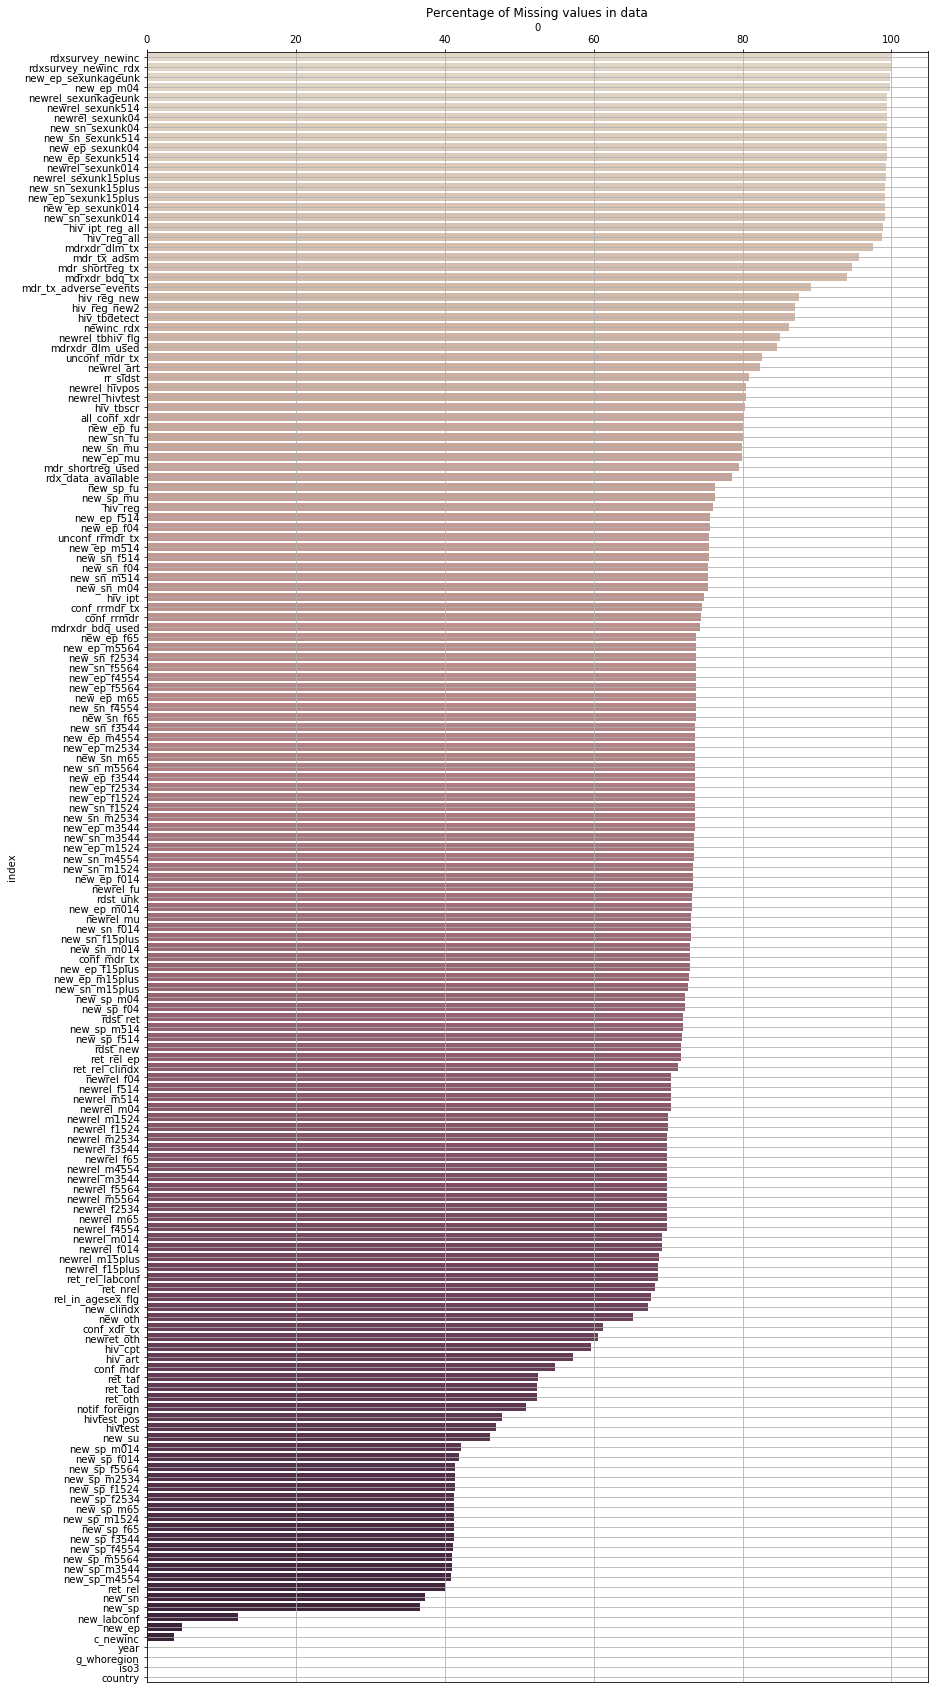

In [191]:
MV = ((df.isnull().sum())*100/len(df)).sort_values(ascending=False).to_frame().reset_index()
MakeBarChart(14,30,"Percentage of Missing values in data",0,'index',MV)
plt.grid()
plt.show()

### Observation(s):
- There are many columns which are having high number of NULL values but we need to be careful before removing them because most of them are related to age related which are important for analysis.

#### Let's first segregate the Gender & Age related columns from the regular dataset

In [192]:
ga_cols=MV[MV['index'].astype(str).str.contains("_sp|_ep|_sn|0|1|2|3|4|5|6|&|8|9")]['index'].tolist()
print(ga_cols)

['new_ep_sexunkageunk', 'new_ep_m04', 'newrel_sexunk514', 'newrel_sexunk04', 'new_sn_sexunk04', 'new_sn_sexunk514', 'new_ep_sexunk04', 'new_ep_sexunk514', 'newrel_sexunk014', 'newrel_sexunk15plus', 'new_sn_sexunk15plus', 'new_ep_sexunk15plus', 'new_ep_sexunk014', 'new_sn_sexunk014', 'hiv_reg_new2', 'new_ep_fu', 'new_sn_fu', 'new_sn_mu', 'new_ep_mu', 'new_sp_fu', 'new_sp_mu', 'new_ep_f514', 'new_ep_f04', 'new_ep_m514', 'new_sn_f514', 'new_sn_f04', 'new_sn_m514', 'new_sn_m04', 'new_ep_f65', 'new_ep_m5564', 'new_sn_f2534', 'new_sn_f5564', 'new_ep_f4554', 'new_ep_f5564', 'new_ep_m65', 'new_sn_f4554', 'new_sn_f65', 'new_sn_f3544', 'new_ep_m4554', 'new_ep_m2534', 'new_sn_m65', 'new_sn_m5564', 'new_ep_f3544', 'new_ep_f2534', 'new_ep_f1524', 'new_sn_f1524', 'new_sn_m2534', 'new_ep_m3544', 'new_sn_m3544', 'new_ep_m1524', 'new_sn_m4554', 'new_sn_m1524', 'new_ep_f014', 'new_ep_m014', 'new_sn_f014', 'new_sn_f15plus', 'new_sn_m014', 'new_ep_f15plus', 'new_ep_m15plus', 'new_sn_m15plus', 'new_sp_m04'

---
* ```new_sp``` - New pulmonary smear-positive cases (not used after 2012)
    - ```new_sp_m``` - For Males
    - ```new_sp_f``` - For Females
    - Both Males and Females further divided into age groups
        * 0-14
        * 15-24
        * 25-34
        * 35-44
        * 45-54
        * 55-64
        * 65 & above
---        
* ```new_sn``` - New pulmonary smear-negative cases (not used after 2012)
    - ```new_sn_m``` - For Males
    - ```new_sn_f``` - For Females
    - Both Males and Females further divided into age groups
        * 0-14
        * 15-24
        * 25-34
        * 35-44
        * 45-54
        * 55-64
        * 65 & above
---
* ```new_su``` - New pulmonary smear unknown/not done cases (until 2012)
---
* ```new_ep``` - New extrapulmonary cases (bacteriologically confirmed or clinically diagnosed). As of 2013 this also includes extrapulmonary cases with unknown previous TB treatment history.
    - ```new_sp_m``` - For Males
    - ```new_sp_f``` - For Females
    - Both Males and Females further divided into age groups
        * 0-14
        * 15-24
        * 25-34
        * 35-44
        * 45-54
        * 55-64
        * 65 & above
---
* ```new_oth``` - Other new cases (not used after 2012)
---
* ```newret_oth``` - Other cases not included in new and re-treatment case numbers (until 2012)
---
* ```new_labconf``` - New pulmonary bacteriologically confirmed TB cases (smear positive or culture positive or positive by WHO-recommended rapid diagnostics such as Xpert MTB/RIF). As of 2013 this also includes pulmonary bacteriologically confirmed cases with unknown previous TB treatment history (until 2018).
---
* ```new_clindx``` - New pulmonary clinically diagnosed TB cases (not bacteriologically confirmed as positive for TB, but diagnosed with active TB by a clinician or another medical practitioner who has decided to give the patient a full course of TB treatment).  It also includes pulmonary clinically diagnosed cases with unknown previous TB treatment history (from 2013 to 2018)

### Let's separate the colums which are not ```gender``` & ```age``` related and remove the one's which are high in null values

In [193]:
non_ga_cols=df[df.columns.difference(ga_cols)].columns.tolist()
print(non_ga_cols)

['all_conf_xdr', 'c_newinc', 'conf_mdr', 'conf_mdr_tx', 'conf_rrmdr', 'conf_rrmdr_tx', 'conf_xdr_tx', 'country', 'g_whoregion', 'hiv_art', 'hiv_cpt', 'hiv_ipt', 'hiv_ipt_reg_all', 'hiv_reg', 'hiv_reg_all', 'hiv_reg_new', 'hiv_tbdetect', 'hiv_tbscr', 'hivtest', 'hivtest_pos', 'mdr_shortreg_tx', 'mdr_shortreg_used', 'mdr_tx_adsm', 'mdr_tx_adverse_events', 'mdrxdr_bdq_tx', 'mdrxdr_bdq_used', 'mdrxdr_dlm_tx', 'mdrxdr_dlm_used', 'new_clindx', 'new_labconf', 'new_oth', 'new_su', 'newinc_rdx', 'newrel_art', 'newrel_fu', 'newrel_hivpos', 'newrel_hivtest', 'newrel_mu', 'newrel_sexunkageunk', 'newrel_tbhiv_flg', 'newret_oth', 'notif_foreign', 'rdst_new', 'rdst_ret', 'rdst_unk', 'rdx_data_available', 'rdxsurvey_newinc', 'rdxsurvey_newinc_rdx', 'rel_in_agesex_flg', 'ret_nrel', 'ret_oth', 'ret_rel', 'ret_rel_clindx', 'ret_rel_labconf', 'ret_tad', 'ret_taf', 'rr_sldst', 'unconf_mdr_tx', 'unconf_rrmdr_tx', 'year']


### Let's check the null percentage in non-gender/age columns

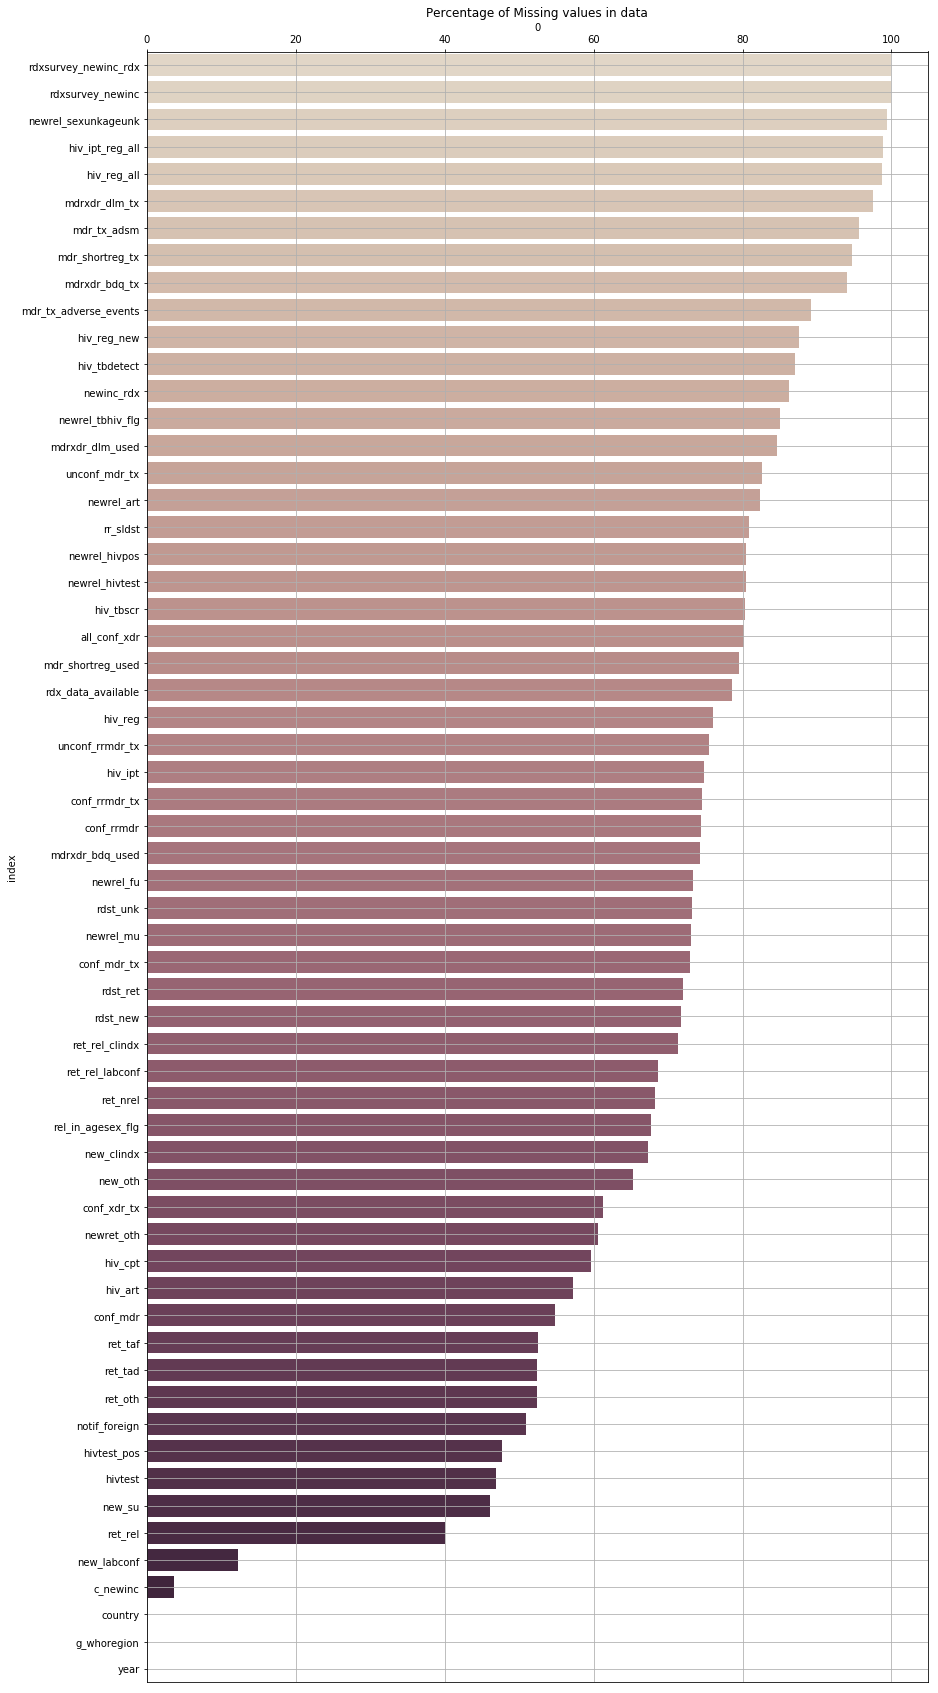

In [194]:
new_mv = ((df[non_ga_cols].isnull().sum())*100/len(df)).sort_values(ascending=False).to_frame().reset_index()
MakeBarChart(14,30,"Percentage of Missing values in data",0,'index',new_mv)
plt.grid()
plt.show()

### Let's Remove the columns from dataset which are having nulls greater than 40%

In [195]:
print(df.shape)
df.drop(columns=list(new_mv[new_mv[0]>40]['index']),inplace=True)
print(df.shape)
df.head()

(3846, 163)
(3846, 108)


,country,iso3,g_whoregion,year,new_sp,new_sn,new_ep,new_labconf,ret_rel_ep,c_newinc,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_mu,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu,new_sn_m04,new_sn_m514,new_sn_m014,new_sn_m1524,new_sn_m2534,new_sn_m3544,new_sn_m4554,new_sn_m5564,new_sn_m65,new_sn_m15plus,new_sn_mu,new_sn_f04,new_sn_f514,new_sn_f014,new_sn_f1524,new_sn_f2534,new_sn_f3544,new_sn_f4554,new_sn_f5564,new_sn_f65,new_sn_f15plus,new_sn_fu,new_sn_sexunk04,new_sn_sexunk514,new_sn_sexunk014,new_sn_sexunk15plus,new_ep_m04,new_ep_m514,new_ep_m014,new_ep_m1524,new_ep_m2534,new_ep_m3544,new_ep_m4554,new_ep_m5564,new_ep_m65,new_ep_m15plus,new_ep_mu,new_ep_f04,new_ep_f514,new_ep_f014,new_ep_f1524,new_ep_f2534,new_ep_f3544,new_ep_f4554,new_ep_f5564,new_ep_f65,new_ep_f15plus,new_ep_fu,new_ep_sexunk04,new_ep_sexunk514,new_ep_sexunk014,new_ep_sexunk15plus,new_ep_sexunkageunk,newrel_m04,newrel_m514,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_m15plus,newrel_f04,newrel_f514,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65,newrel_f15plus,newrel_sexunk04,newrel_sexunk514,newrel_sexunk014,newrel_sexunk15plus,hiv_reg_new2
21,Afghanistan,AFG,EMR,2001,4639.0,2739.0,2552.0,NaN,NaN,10139.0,NaN,NaN,129.0,379.0,349.0,274.0,204.0,139.0,103.0,NaN,NaN,NaN,146.0,799.0,888.0,586.0,375.0,179.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Afghanistan,AFG,EMR,2002,6509.0,3386.0,3305.0,6509.0,NaN,13794.0,NaN,NaN,90.0,476.0,481.0,368.0,246.0,241.0,189.0,NaN,NaN,NaN,192.0,1119.0,1251.0,792.0,526.0,320.0,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Afghanistan,AFG,EMR,2003,6510.0,3440.0,3254.0,6510.0,NaN,13808.0,NaN,NaN,127.0,511.0,436.0,284.0,256.0,288.0,203.0,NaN,NaN,NaN,245.0,1152.0,1287.0,814.0,462.0,305.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Afghanistan,AFG,EMR,2004,8273.0,5437.0,3800.0,8273.0,NaN,18404.0,NaN,NaN,139.0,537.0,568.0,360.0,358.0,386.0,310.0,NaN,NaN,NaN,256.0,1360.0,1561.0,1096.0,645.0,413.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Afghanistan,AFG,EMR,2005,9949.0,6085.0,4954.0,9949.0,NaN,21844.0,NaN,NaN,151.0,606.0,560.0,472.0,453.0,470.0,419.0,NaN,NaN,NaN,320.0,1651.0,1959.0,1302.0,869.0,471.0,246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


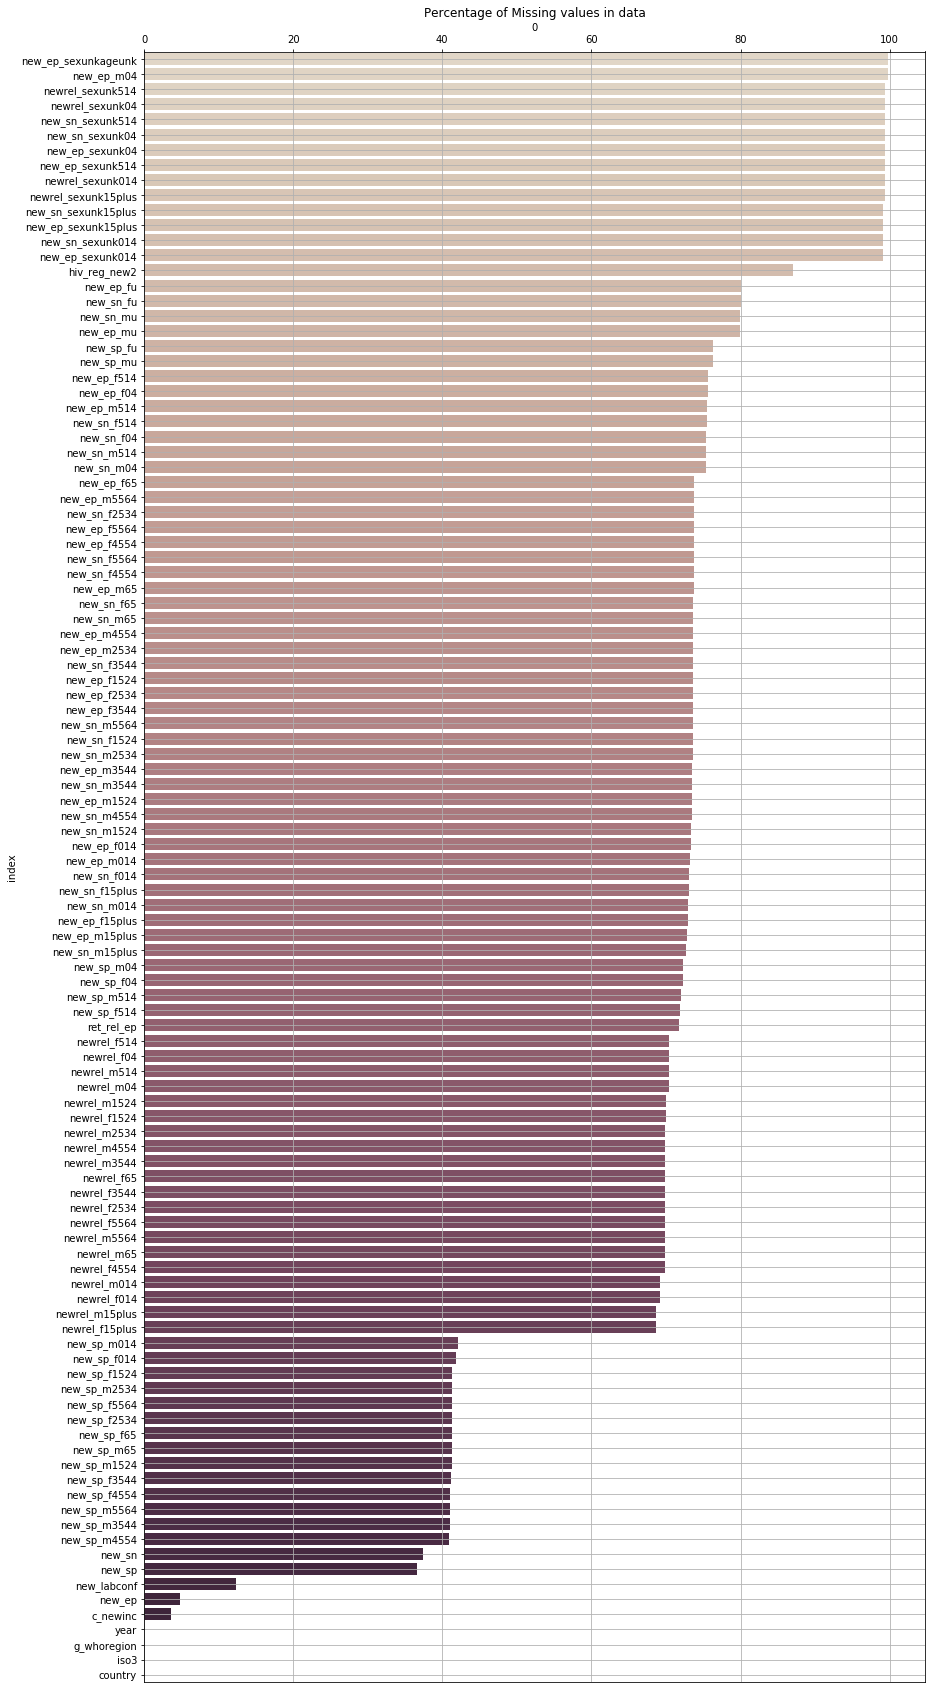

In [196]:
MV = ((df.isnull().sum())*100/len(df)).sort_values(ascending=False).to_frame().reset_index()
MakeBarChart(14,30,"Percentage of Missing values in data",0,'index',MV)
plt.grid()
plt.show()

### Observation(s):
After looking at the above graph we can observe that we are left with columns
- Country Name
- Country Small Name
- WHO Region
- Year
- Rest of the columns are age and gender based on Pulmonary +ve/-ve OR Extrapulmonary OR New/Relapse Cases

#### Let's create separate frame for each of them to analyse them better
---
### Pulmonary - smear positive
- As per WHO, The revised definition of a new sputum smear-positive pulmonary TB case is based on the presence of at least one acid fast bacilli (AFB+) in at least one sputum sample in countries with a well functioning external quality assurance (EQA) system
- New pulmonary smear-positive cases (not used after 2012)
    * This means we will delete the data after 2012

In [197]:
new_sp_df=df.filter(like='new_sp', axis=1)
new_sp_df[['country','iso3','g_whoregion','year','c_newinc']]=df[['country','iso3','g_whoregion','year','c_newinc']]
new_sp_df=new_sp_df[(new_sp_df['year']!=2013) &
                    (new_sp_df['year']!=2014) &
                    (new_sp_df['year']!=2015) &
                    (new_sp_df['year']!=2016) &
                    (new_sp_df['year']!=2017) &
                    (new_sp_df['year']!=2018)
                   ]
new_sp_df.head()

,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_mu,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu,country,iso3,g_whoregion,year,c_newinc
21,4639.0,NaN,NaN,129.0,379.0,349.0,274.0,204.0,139.0,103.0,NaN,NaN,NaN,146.0,799.0,888.0,586.0,375.0,179.0,89.0,NaN,Afghanistan,AFG,EMR,2001,10139.0
22,6509.0,NaN,NaN,90.0,476.0,481.0,368.0,246.0,241.0,189.0,NaN,NaN,NaN,192.0,1119.0,1251.0,792.0,526.0,320.0,218.0,NaN,Afghanistan,AFG,EMR,2002,13794.0
23,6510.0,NaN,NaN,127.0,511.0,436.0,284.0,256.0,288.0,203.0,NaN,NaN,NaN,245.0,1152.0,1287.0,814.0,462.0,305.0,158.0,NaN,Afghanistan,AFG,EMR,2003,13808.0
24,8273.0,NaN,NaN,139.0,537.0,568.0,360.0,358.0,386.0,310.0,NaN,NaN,NaN,256.0,1360.0,1561.0,1096.0,645.0,413.0,256.0,NaN,Afghanistan,AFG,EMR,2004,18404.0
25,9949.0,NaN,NaN,151.0,606.0,560.0,472.0,453.0,470.0,419.0,NaN,NaN,NaN,320.0,1651.0,1959.0,1302.0,869.0,471.0,246.0,NaN,Afghanistan,AFG,EMR,2005,21844.0


#### We can see from the above data set that there are columns ```new_sp_m014``` & ```new_sp_f014``` which states ages range from 0-14 but there are other 4 columns ```new_sp_m04```+ ``` new_sp_m514``` & ```new_sp_f04```+ ``` new_sp_f514```</b>

<b>Action:</b> We will remove ```new_sp_m04```+ ``` new_sp_m514``` & ```new_sp_f04```+ ``` new_sp_f514```

In addition, we will remove the cases where age is unknown ```new_sp_mu``` & ```new_sp_fu```

In [198]:
new_sp_df.drop(columns=['new_sp_m04','new_sp_m514','new_sp_f04','new_sp_f514','new_sp_mu','new_sp_fu'],
                        inplace=True)
new_sp_df.head()

,new_sp,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,country,iso3,g_whoregion,year,c_newinc
21,4639.0,129.0,379.0,349.0,274.0,204.0,139.0,103.0,146.0,799.0,888.0,586.0,375.0,179.0,89.0,Afghanistan,AFG,EMR,2001,10139.0
22,6509.0,90.0,476.0,481.0,368.0,246.0,241.0,189.0,192.0,1119.0,1251.0,792.0,526.0,320.0,218.0,Afghanistan,AFG,EMR,2002,13794.0
23,6510.0,127.0,511.0,436.0,284.0,256.0,288.0,203.0,245.0,1152.0,1287.0,814.0,462.0,305.0,158.0,Afghanistan,AFG,EMR,2003,13808.0
24,8273.0,139.0,537.0,568.0,360.0,358.0,386.0,310.0,256.0,1360.0,1561.0,1096.0,645.0,413.0,256.0,Afghanistan,AFG,EMR,2004,18404.0
25,9949.0,151.0,606.0,560.0,472.0,453.0,470.0,419.0,320.0,1651.0,1959.0,1302.0,869.0,471.0,246.0,Afghanistan,AFG,EMR,2005,21844.0


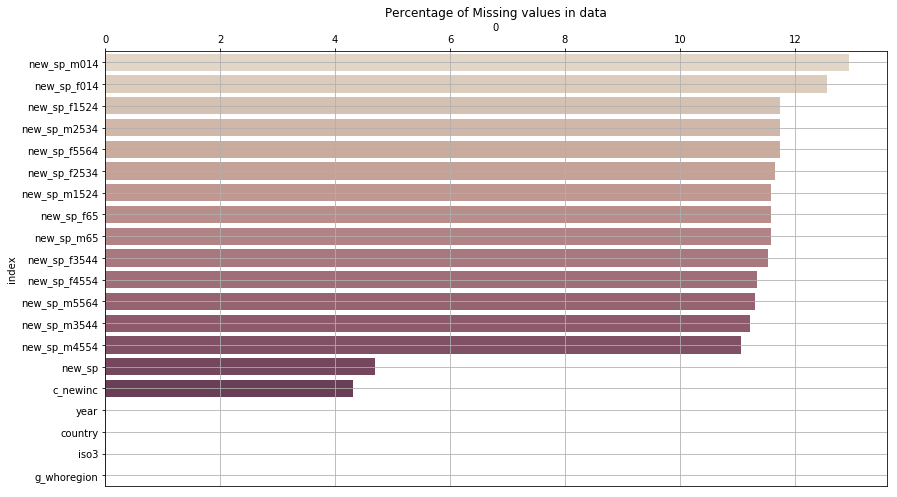

In [199]:
MV = ((new_sp_df.isnull().sum())*100/len(new_sp_df)).sort_values(ascending=False).to_frame().reset_index()
MakeBarChart(14,8,"Percentage of Missing values in data",0,'index',MV)
plt.grid()
plt.show()

### From above chart it is clearly visibile that new_sp is having some null values which should not be case as it is a total of all the ```smear positive``` cases.
#### Let's check and delete the rows if required

In [200]:
new_sp_df[new_sp_df['new_sp'].isnull()]

,new_sp,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,country,iso3,g_whoregion,year,c_newinc
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Samoa,ASM,WPR,2012,NaN
257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Anguilla,AIA,AMR,2003,0.0
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,AIA,AMR,2005,NaN
262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,AIA,AMR,2008,NaN
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,AIA,AMR,2009,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antigua and Barbuda,ATG,AMR,2004,NaN
411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,AMR,2001,NaN
412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,AMR,2002,NaN
413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,AMR,2003,NaN
414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,AMR,2004,NaN


#### Where ever new_sp is null other columns are also null so we can remove these rows as they are not going to impact the analysis but will reduce the computational power

(2556, 20)
(2436, 20)


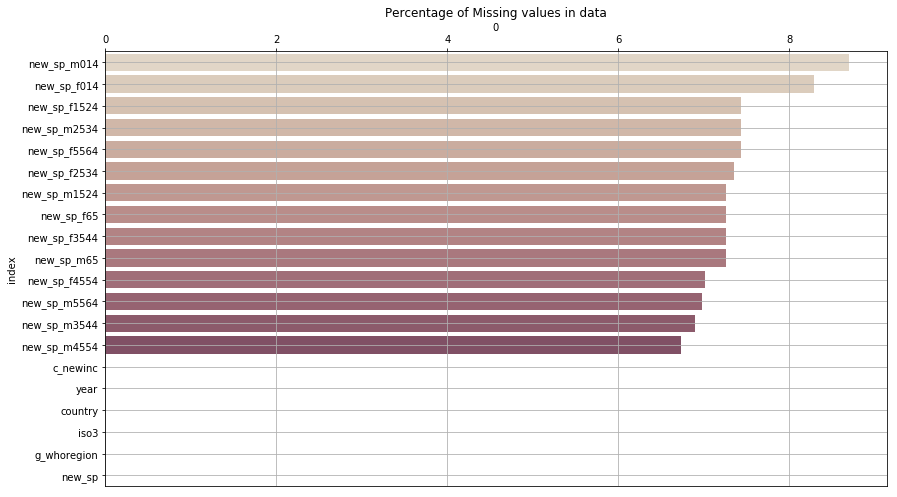

In [201]:
print(new_sp_df.shape)
new_sp_df.drop(index=new_sp_df[new_sp_df['new_sp'].isnull()].index.tolist(), inplace=True)
print(new_sp_df.shape)
MV = ((new_sp_df.isnull().sum())*100/len(new_sp_df)).sort_values(ascending=False).to_frame().reset_index()
MakeBarChart(14,8,"Percentage of Missing values in data",0,'index',MV)
plt.grid()
plt.show()

In [202]:
new_sp_df[new_sp_df['new_sp_m014'].isnull()]

,new_sp,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,country,iso3,g_whoregion,year,c_newinc
138,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,American Samoa,ASM,WPR,2001,3.0
139,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Samoa,ASM,WPR,2002,2.0
140,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,American Samoa,ASM,WPR,2003,3.0
141,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,American Samoa,ASM,WPR,2004,5.0
142,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,American Samoa,ASM,WPR,2005,6.0
143,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,American Samoa,ASM,WPR,2006,4.0
144,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Samoa,ASM,WPR,2007,3.0
148,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Samoa,ASM,WPR,2011,3.0
183,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,Andorra,AND,EUR,2007,5.0
255,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,AIA,AMR,2001,0.0


#### After observing the above data we found new_sp which should be the total of all age related columns but in some rows cound is not matching.
- e.g.: index # 141
---

#### To conclude the total count we will sum all age related columns and will compare against the ```total_sp```
- To perform the sum we need to fill the null entries with 0

In [203]:
## Filling Null with 0
new_sp_df=new_sp_df.fillna(0)

## Adding all age related columns
new_sp_df['New_Total']=(new_sp_df['new_sp_m014']+
                    new_sp_df['new_sp_m1524']+
                    new_sp_df['new_sp_m2534']+
                    new_sp_df['new_sp_m3544']+
                    new_sp_df['new_sp_m4554']+
                    new_sp_df['new_sp_m5564']+
                    new_sp_df['new_sp_m65']+
                    new_sp_df['new_sp_f014']+
                    new_sp_df['new_sp_f1524']+
                    new_sp_df['new_sp_f2534']+
                    new_sp_df['new_sp_f3544']+
                    new_sp_df['new_sp_f4554']+
                    new_sp_df['new_sp_f5564']+
                    new_sp_df['new_sp_f65']
                   )

## Re-arranging the Columns
cols=list(new_sp_df.columns)
cols=cols[-6:]+cols[:-6]
new_sp_df=new_sp_df[cols]
new_sp_df.head()

,country,iso3,g_whoregion,year,c_newinc,New_Total,new_sp,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65
21,Afghanistan,AFG,EMR,2001,10139.0,4639.0,4639.0,129.0,379.0,349.0,274.0,204.0,139.0,103.0,146.0,799.0,888.0,586.0,375.0,179.0,89.0
22,Afghanistan,AFG,EMR,2002,13794.0,6509.0,6509.0,90.0,476.0,481.0,368.0,246.0,241.0,189.0,192.0,1119.0,1251.0,792.0,526.0,320.0,218.0
23,Afghanistan,AFG,EMR,2003,13808.0,6528.0,6510.0,127.0,511.0,436.0,284.0,256.0,288.0,203.0,245.0,1152.0,1287.0,814.0,462.0,305.0,158.0
24,Afghanistan,AFG,EMR,2004,18404.0,8245.0,8273.0,139.0,537.0,568.0,360.0,358.0,386.0,310.0,256.0,1360.0,1561.0,1096.0,645.0,413.0,256.0
25,Afghanistan,AFG,EMR,2005,21844.0,9949.0,9949.0,151.0,606.0,560.0,472.0,453.0,470.0,419.0,320.0,1651.0,1959.0,1302.0,869.0,471.0,246.0


### Let's check whether do we have any ```0``` in ```New_Total```

In [204]:
new_sp_df[new_sp_df['New_Total']==0]

,country,iso3,g_whoregion,year,c_newinc,New_Total,new_sp,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65
144,American Samoa,ASM,WPR,2007,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,American Samoa,ASM,WPR,2008,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,American Samoa,ASM,WPR,2009,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,American Samoa,ASM,WPR,2010,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,American Samoa,ASM,WPR,2011,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,Andorra,AND,EUR,2010,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,Anguilla,AIA,AMR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,Anguilla,AIA,AMR,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,Anguilla,AIA,AMR,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,Anguilla,AIA,AMR,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### As we can see from the above frame that given total and calculated are having mismatches where ```New_Total``` has 0s but given total is having a count even count is not given for any gender or any age.
- Action: We need to merge the records from original given total to New_Total where New_Total is Zero and given total is having a count to have the right analysis

In [205]:
new_sp_df['Final']=np.where(new_sp_df['New_Total']==0, new_sp_df['new_sp'], new_sp_df['New_Total'])
new_sp_df.head()

,country,iso3,g_whoregion,year,c_newinc,New_Total,new_sp,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,Final
21,Afghanistan,AFG,EMR,2001,10139.0,4639.0,4639.0,129.0,379.0,349.0,274.0,204.0,139.0,103.0,146.0,799.0,888.0,586.0,375.0,179.0,89.0,4639.0
22,Afghanistan,AFG,EMR,2002,13794.0,6509.0,6509.0,90.0,476.0,481.0,368.0,246.0,241.0,189.0,192.0,1119.0,1251.0,792.0,526.0,320.0,218.0,6509.0
23,Afghanistan,AFG,EMR,2003,13808.0,6528.0,6510.0,127.0,511.0,436.0,284.0,256.0,288.0,203.0,245.0,1152.0,1287.0,814.0,462.0,305.0,158.0,6528.0
24,Afghanistan,AFG,EMR,2004,18404.0,8245.0,8273.0,139.0,537.0,568.0,360.0,358.0,386.0,310.0,256.0,1360.0,1561.0,1096.0,645.0,413.0,256.0,8245.0
25,Afghanistan,AFG,EMR,2005,21844.0,9949.0,9949.0,151.0,606.0,560.0,472.0,453.0,470.0,419.0,320.0,1651.0,1959.0,1302.0,869.0,471.0,246.0,9949.0


#### Re-arranging the columns

In [206]:
## Re-arranging the Columns
cols=list(new_sp_df.columns)
cols=cols[:5]+cols[-1:]+cols[5:-1]
new_sp_df=new_sp_df[cols]
new_sp_df.head()

,country,iso3,g_whoregion,year,c_newinc,Final,New_Total,new_sp,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65
21,Afghanistan,AFG,EMR,2001,10139.0,4639.0,4639.0,4639.0,129.0,379.0,349.0,274.0,204.0,139.0,103.0,146.0,799.0,888.0,586.0,375.0,179.0,89.0
22,Afghanistan,AFG,EMR,2002,13794.0,6509.0,6509.0,6509.0,90.0,476.0,481.0,368.0,246.0,241.0,189.0,192.0,1119.0,1251.0,792.0,526.0,320.0,218.0
23,Afghanistan,AFG,EMR,2003,13808.0,6528.0,6528.0,6510.0,127.0,511.0,436.0,284.0,256.0,288.0,203.0,245.0,1152.0,1287.0,814.0,462.0,305.0,158.0
24,Afghanistan,AFG,EMR,2004,18404.0,8245.0,8245.0,8273.0,139.0,537.0,568.0,360.0,358.0,386.0,310.0,256.0,1360.0,1561.0,1096.0,645.0,413.0,256.0
25,Afghanistan,AFG,EMR,2005,21844.0,9949.0,9949.0,9949.0,151.0,606.0,560.0,472.0,453.0,470.0,419.0,320.0,1651.0,1959.0,1302.0,869.0,471.0,246.0


#### Let's confirm the values

In [207]:
new_sp_df[new_sp_df['New_Total']==0]

,country,iso3,g_whoregion,year,c_newinc,Final,New_Total,new_sp,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65
144,American Samoa,ASM,WPR,2007,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,American Samoa,ASM,WPR,2008,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,American Samoa,ASM,WPR,2009,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,American Samoa,ASM,WPR,2010,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,American Samoa,ASM,WPR,2011,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,Andorra,AND,EUR,2010,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,Anguilla,AIA,AMR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,Anguilla,AIA,AMR,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,Anguilla,AIA,AMR,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,Anguilla,AIA,AMR,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Region wise Analysis
#### Visualizing which region wise count of SP-TB casesaround the world
- ```AMR -> Region of Americas```
- ```WPR -> Western Pacific Region```
- ```AFR -> African Region```
- ```EMR -> Eastern Mediterranean Region```
- ```EUR -> European Region```
- ```SEA -> South East Asian Region```

In [217]:
## Creating a dataframe for Regions Total only be creating a pivot
region_sp_df=new_sp_df.pivot_table(index='g_whoregion',values='Final',aggfunc=np.sum).reset_index()
#region_sp_df

## Plotting BAR and PIE graph using plotly
region_sp_df.iplot(kind='bar',x='g_whoregion',y='Final',
                   title='Region wise Count of TB-SP Cases until 2012 as per WHO',
                   xTitle='WHO Regions',
                   yTitle='Count -->',
                  )
region_sp_df.iplot(kind='pie',labels = 'g_whoregion', values = 'Final')

### Clearly visibile that SEA has the overall highest number of cases followed by WPR -> AFR -> EMR -> AMR -> EUR with least number of overall cases in last 2 decades

---
### Let's breakdown to country level to see in which region which country is having highest number of cases

In [209]:
## Creating Dataframe using Pivot of Region and Country and their Total
region_country_sp_df=new_sp_df.pivot_table(index=['g_whoregion','country'],values='Final',aggfunc=np.sum).reset_index()

## Visualizing the Countries using interactive ipywidgets
@interact
def region_country(Region=list(region_sp_df['g_whoregion'])):
    temp=region_country_sp_df[region_country_sp_df['g_whoregion']==Region][['country','Final']]
    return(temp.iplot(kind='bar',x='country',y='Final',
                   title='Country wise Count',
                   xTitle='Countries',
                   yTitle='Count -->',
                  ))

interactive(children=(Dropdown(description='Region', options=('AFR', 'AMR', 'EMR', 'EUR', 'SEA', 'WPR'), value…

#### Let's check the Yearly trend of each Region

In [210]:
## Creating Dataframe using Pivot of Region and Country and their Total
region_year_sp_df=new_sp_df.pivot_table(index=['g_whoregion','year'],values='Final',aggfunc=np.sum).reset_index()

## Visualizing the Countries using interactive ipywidgets
@interact
def region_year(Region=list(region_sp_df['g_whoregion'])):
    temp=region_year_sp_df[region_year_sp_df['g_whoregion']==Region][['year','Final']]
    return(temp.iplot(kind='bar',x='year',y='Final',
                   title='Year wise Count of each Region',
                   xTitle='Years -->',
                   yTitle='Count -->',
                  ))

interactive(children=(Dropdown(description='Region', options=('AFR', 'AMR', 'EMR', 'EUR', 'SEA', 'WPR'), value…

In [211]:
yr_region_sp_df=new_sp_df.pivot_table(index=['year','g_whoregion'],values='Final',aggfunc=np.sum).reset_index()
px.line(yr_region_sp_df, x="year", y="Final", color="g_whoregion",
       title='Year wise count of each Region')

### Let's compare the Region Wise count against each Year

In [212]:
## Creating Dataframe using Pivot of Year, Region and their Total
year_region_sp_df=new_sp_df.pivot_table(index=['year','g_whoregion'],values='Final',aggfunc=np.sum).reset_index()

## Visualizing the Countries using interactive ipywidgets
@interact
def year_region(Year=list(new_sp_df['year'].unique())):
    temp=year_region_sp_df[year_region_sp_df['year']==Year][['g_whoregion','Final']]
    return(temp.iplot(kind='bar',x='g_whoregion',y='Final',
                   title='Yearly Region wise Count',
                   xTitle='Regions',
                   yTitle='Count -->',
                  ))

interactive(children=(Dropdown(description='Year', options=(2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 20…

### Let's visualize Gender Wise distribution across regions
#### Let's take a sum total of Male and Females

In [213]:
## Male Total
new_sp_df['Male_total']=new_sp_df.filter(regex='new_sp_m').sum(axis=1)

## Female Total
new_sp_df['Female_total']=new_sp_df.filter(regex='new_sp_f').sum(axis=1)

## Re-arranging the Columns
cols=list(new_sp_df.columns)
cols=cols[:6]+cols[-2:]+cols[6:-2]
new_sp_df=new_sp_df[cols]
new_sp_df.head()

,country,iso3,g_whoregion,year,c_newinc,Final,Male_total,Female_total,New_Total,new_sp,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65
21,Afghanistan,AFG,EMR,2001,10139.0,4639.0,1577.0,3062.0,4639.0,4639.0,129.0,379.0,349.0,274.0,204.0,139.0,103.0,146.0,799.0,888.0,586.0,375.0,179.0,89.0
22,Afghanistan,AFG,EMR,2002,13794.0,6509.0,2091.0,4418.0,6509.0,6509.0,90.0,476.0,481.0,368.0,246.0,241.0,189.0,192.0,1119.0,1251.0,792.0,526.0,320.0,218.0
23,Afghanistan,AFG,EMR,2003,13808.0,6528.0,2105.0,4423.0,6528.0,6510.0,127.0,511.0,436.0,284.0,256.0,288.0,203.0,245.0,1152.0,1287.0,814.0,462.0,305.0,158.0
24,Afghanistan,AFG,EMR,2004,18404.0,8245.0,2658.0,5587.0,8245.0,8273.0,139.0,537.0,568.0,360.0,358.0,386.0,310.0,256.0,1360.0,1561.0,1096.0,645.0,413.0,256.0
25,Afghanistan,AFG,EMR,2005,21844.0,9949.0,3131.0,6818.0,9949.0,9949.0,151.0,606.0,560.0,472.0,453.0,470.0,419.0,320.0,1651.0,1959.0,1302.0,869.0,471.0,246.0


#### Visualization Male and Female distribution across regions

In [214]:
px.bar(new_sp_df,x='g_whoregion',y=['Male_total','Female_total'],
       barmode='group', title='Gender wise count across Regions'
      )

## PENDING 
- Select Region -> Country & Gender Wise
- Select Region -> Country & Age group Wise
- Select Country -> Age & Gender Wise
- Select Country -> Pie for Age Group

---
### Pulmonary - smear negative
- New pulmonary smear-negative cases (not used after 2012)
    * This means we will delete the data after 2012

In [ ]:
new_sn_df=df.filter(like='new_sn', axis=1)
new_sn_df[['country','iso3','g_whoregion','year','c_newinc']]=df[['country','iso3','g_whoregion','year','c_newinc']]
new_sn_df=new_sn_df[(new_sn_df['year']!=2013) &
                    (new_sn_df['year']!=2014) &
                    (new_sn_df['year']!=2015) &
                    (new_sn_df['year']!=2016) &
                    (new_sn_df['year']!=2017) &
                    (new_sn_df['year']!=2018)
                   ]
new_sn_df.head()

---

### Extra pulmonary
- Extrapulmonary tuberculosis is tuberculosis (TB) within a location in the body other than the lungs

In [ ]:
new_ep_df=df.filter(like='new_ep', axis=1)
new_ep_df[['country','iso3','g_whoregion','year','c_newinc']]=df[['country','iso3','g_whoregion','year','c_newinc']]
new_ep_df.head()

---

### New pulmonary bacteriologically confirmed TB cases (smear positive or culture positive or positive by WHO-recommended rapid diagnostics such as Xpert MTB/RIF). As of 2013 this also includes pulmonary bacteriologically confirmed cases with unknown previous TB treatment history.

In [ ]:
df.new_labconf.isnull().sum()/len(df)

In [ ]:
new_labconf_df=df[['country','iso3','g_whoregion','year','c_newinc','new_labconf']]
new_labconf_df.head()

---
#### We can see from the above data set that there are columns ```new_sn_m014``` & ```new_sn_f014``` which states ages range from 0-14 but there are other 4 columns ```new_sn_m04```+ ``` new_sn_m514``` & ```new_sn_f04```+ ``` new_sn_f514```</b>

<b>Action:</b> We will remove ```new_sn_m04```+ ``` new_sn_m514``` & ```new_sn_f04```+ ``` new_sn_f514```

#### There are another 2 columns with name ```new_sn_m15plus``` & ```new_sn_f15plus```
<b>Action:</b> We will remove ```new_sn_m15plus``` & ```new_sn_f15plus```